In [1]:
# Adarsh Anand
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,train_test_split)
from sklearn.metrics import (accuracy_score, classification_report,
confusion_matrix, mean_absolute_error,roc_auc_score)
from sklearn.ensemble import (AdaBoostClassifier, RandomForestClassifier,RandomForestRegressor)
import re,random,sys,json,time,os,warnings,pickle,datetime,subprocess,requests,math
import pyforest,klib,missingno as msno
import numpy as np, pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from typing import List, Dict, Tuple, Any
#import keras as kr,tensorflow as tf,cv2 as cv

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5,
        palette='plasma', font='Arial', rc={'figure.figsize': (10, 8)})

In [2]:
!pip install yahooquery

In [3]:
from yahooquery import Ticker

aapl = Ticker('aapl')

aapl.summary_detail

{'aapl': {'maxAge': 1,
  'priceHint': 2,
  'previousClose': 168.88,
  'open': 169.82,
  'dayLow': 166.19,
  'dayHigh': 170.5413,
  'regularMarketPreviousClose': 168.88,
  'regularMarketOpen': 169.82,
  'regularMarketDayLow': 166.19,
  'regularMarketDayHigh': 170.5413,
  'dividendRate': 0.88,
  'dividendYield': 0.0053,
  'exDividendDate': '2022-02-04 05:30:00',
  'payoutRatio': 0.1434,
  'fiveYearAvgDividendYield': 1.15,
  'beta': 1.187468,
  'trailingPE': 27.8138,
  'forwardPE': 25.50305,
  'volume': 82772674,
  'regularMarketVolume': 82772674,
  'averageVolume': 101271931,
  'averageVolume10days': 77665000,
  'averageDailyVolume10Day': 77665000,
  'bid': 166.48,
  'ask': 166.59,
  'bidSize': 900,
  'askSize': 800,
  'marketCap': 2730235789312,
  'fiftyTwoWeekLow': 116.21,
  'fiftyTwoWeekHigh': 182.94,
  'priceToSalesTrailing12Months': 7.216679,
  'fiftyDayAverage': 172.4622,
  'twoHundredDayAverage': 151.1004,
  'trailingAnnualDividendRate': 0.865,
  'trailingAnnualDividendYield': 0.0

In [4]:
from yahooquery import Ticker

symbols = ['fb', 'aapl', 'amzn', 'nflx', 'goog']

faang = Ticker(symbols)

faang.summary_detail

{'fb': {'maxAge': 1,
  'priceHint': 2,
  'previousClose': 207.71,
  'open': 209.39,
  'dayLow': 205.18,
  'dayHigh': 210.74,
  'regularMarketPreviousClose': 207.71,
  'regularMarketOpen': 209.39,
  'regularMarketDayLow': 205.18,
  'regularMarketDayHigh': 210.74,
  'payoutRatio': 0.0,
  'beta': 1.28543,
  'trailingPE': 14.971678,
  'forwardPE': 13.901551,
  'volume': 37128438,
  'regularMarketVolume': 37128438,
  'averageVolume': 30726560,
  'averageVolume10days': 56780300,
  'averageDailyVolume10Day': 56780300,
  'bid': 204.6,
  'ask': 204.66,
  'bidSize': 1100,
  'askSize': 1000,
  'marketCap': 561155145728,
  'fiftyTwoWeekLow': 205.18,
  'fiftyTwoWeekHigh': 384.33,
  'priceToSalesTrailing12Months': 4.758415,
  'fiftyDayAverage': 301.567,
  'twoHundredDayAverage': 332.34616,
  'trailingAnnualDividendRate': 0.0,
  'trailingAnnualDividendYield': 0.0,
  'currency': 'USD',
  'fromCurrency': None,
  'toCurrency': None,
  'lastMarket': None,
  'algorithm': None,
  'tradeable': False},
 'aap

In [5]:
from yahooquery import Ticker

symbols = ['fb', 'aapl', 'amzn', 'nflx', 'goog']

faang = Ticker(symbols)
dict = faang.summary_detail

df=pd.DataFrame(dict, columns=dict.keys())
df=df.T

df

,maxAge,priceHint,previousClose,open,dayLow,dayHigh,regularMarketPreviousClose,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,payoutRatio,beta,trailingPE,forwardPE,volume,regularMarketVolume,averageVolume,averageVolume10days,averageDailyVolume10Day,bid,ask,bidSize,askSize,marketCap,fiftyTwoWeekLow,fiftyTwoWeekHigh,priceToSalesTrailing12Months,fiftyDayAverage,twoHundredDayAverage,trailingAnnualDividendRate,trailingAnnualDividendYield,currency,fromCurrency,toCurrency,lastMarket,algorithm,tradeable,dividendRate,dividendYield,exDividendDate,fiveYearAvgDividendYield
fb,1,2,207.71,209.39,205.18,210.74,207.71,209.39,205.18,210.74,0.00,1.29,14.97,13.90,37128438,37128438,30726560,56780300,56780300,204.60,204.66,1100,1000,561155145728,205.18,384.33,4.76,301.57,332.35,0.00,0.00,USD,None,None,None,None,False,NaN,NaN,NaN,NaN
aapl,1,2,168.88,169.82,166.19,170.54,168.88,169.82,166.19,170.54,0.14,1.19,27.81,25.50,82772674,82772674,101271931,77665000,77665000,166.48,166.59,900,800,2730235789312,116.21,182.94,7.22,172.46,151.10,0.86,0.01,USD,None,None,None,None,False,0.88,0.01,2022-02-04 05:30:00,1.15
amzn,1,2,3093.05,3109.99,3018.22,3109.99,3093.05,3109.99,3018.22,3109.99,0.00,1.13,47.09,42.21,3180205,3180205,3668486,3565250,3565250,3030.00,3034.00,1400,800,1553007116288,2707.04,3773.08,3.31,3199.81,3355.77,0.00,0.00,USD,None,None,None,None,False,NaN,NaN,NaN,NaN
nflx,1,2,386.67,392.53,389.07,402.87,386.67,392.53,389.07,402.87,0.00,0.96,34.81,27.48,6801668,6801668,7205883,6813950,6813950,389.05,389.51,1200,800,173718290432,351.46,700.99,5.85,502.79,552.83,0.00,0.00,USD,None,None,None,None,False,NaN,NaN,NaN,NaN
goog,1,2,2646.17,2660.75,2606.14,2676.48,2646.17,2660.75,2606.14,2676.48,0.00,1.07,23.26,19.26,1570608,1570608,1460732,1604990,1604990,2597.01,2600.00,1000,1200,1724261203968,2002.02,3042.00,6.69,2797.06,2736.01,0.00,0.00,USD,None,None,None,None,False,NaN,NaN,NaN,NaN


<AxesSubplot:>

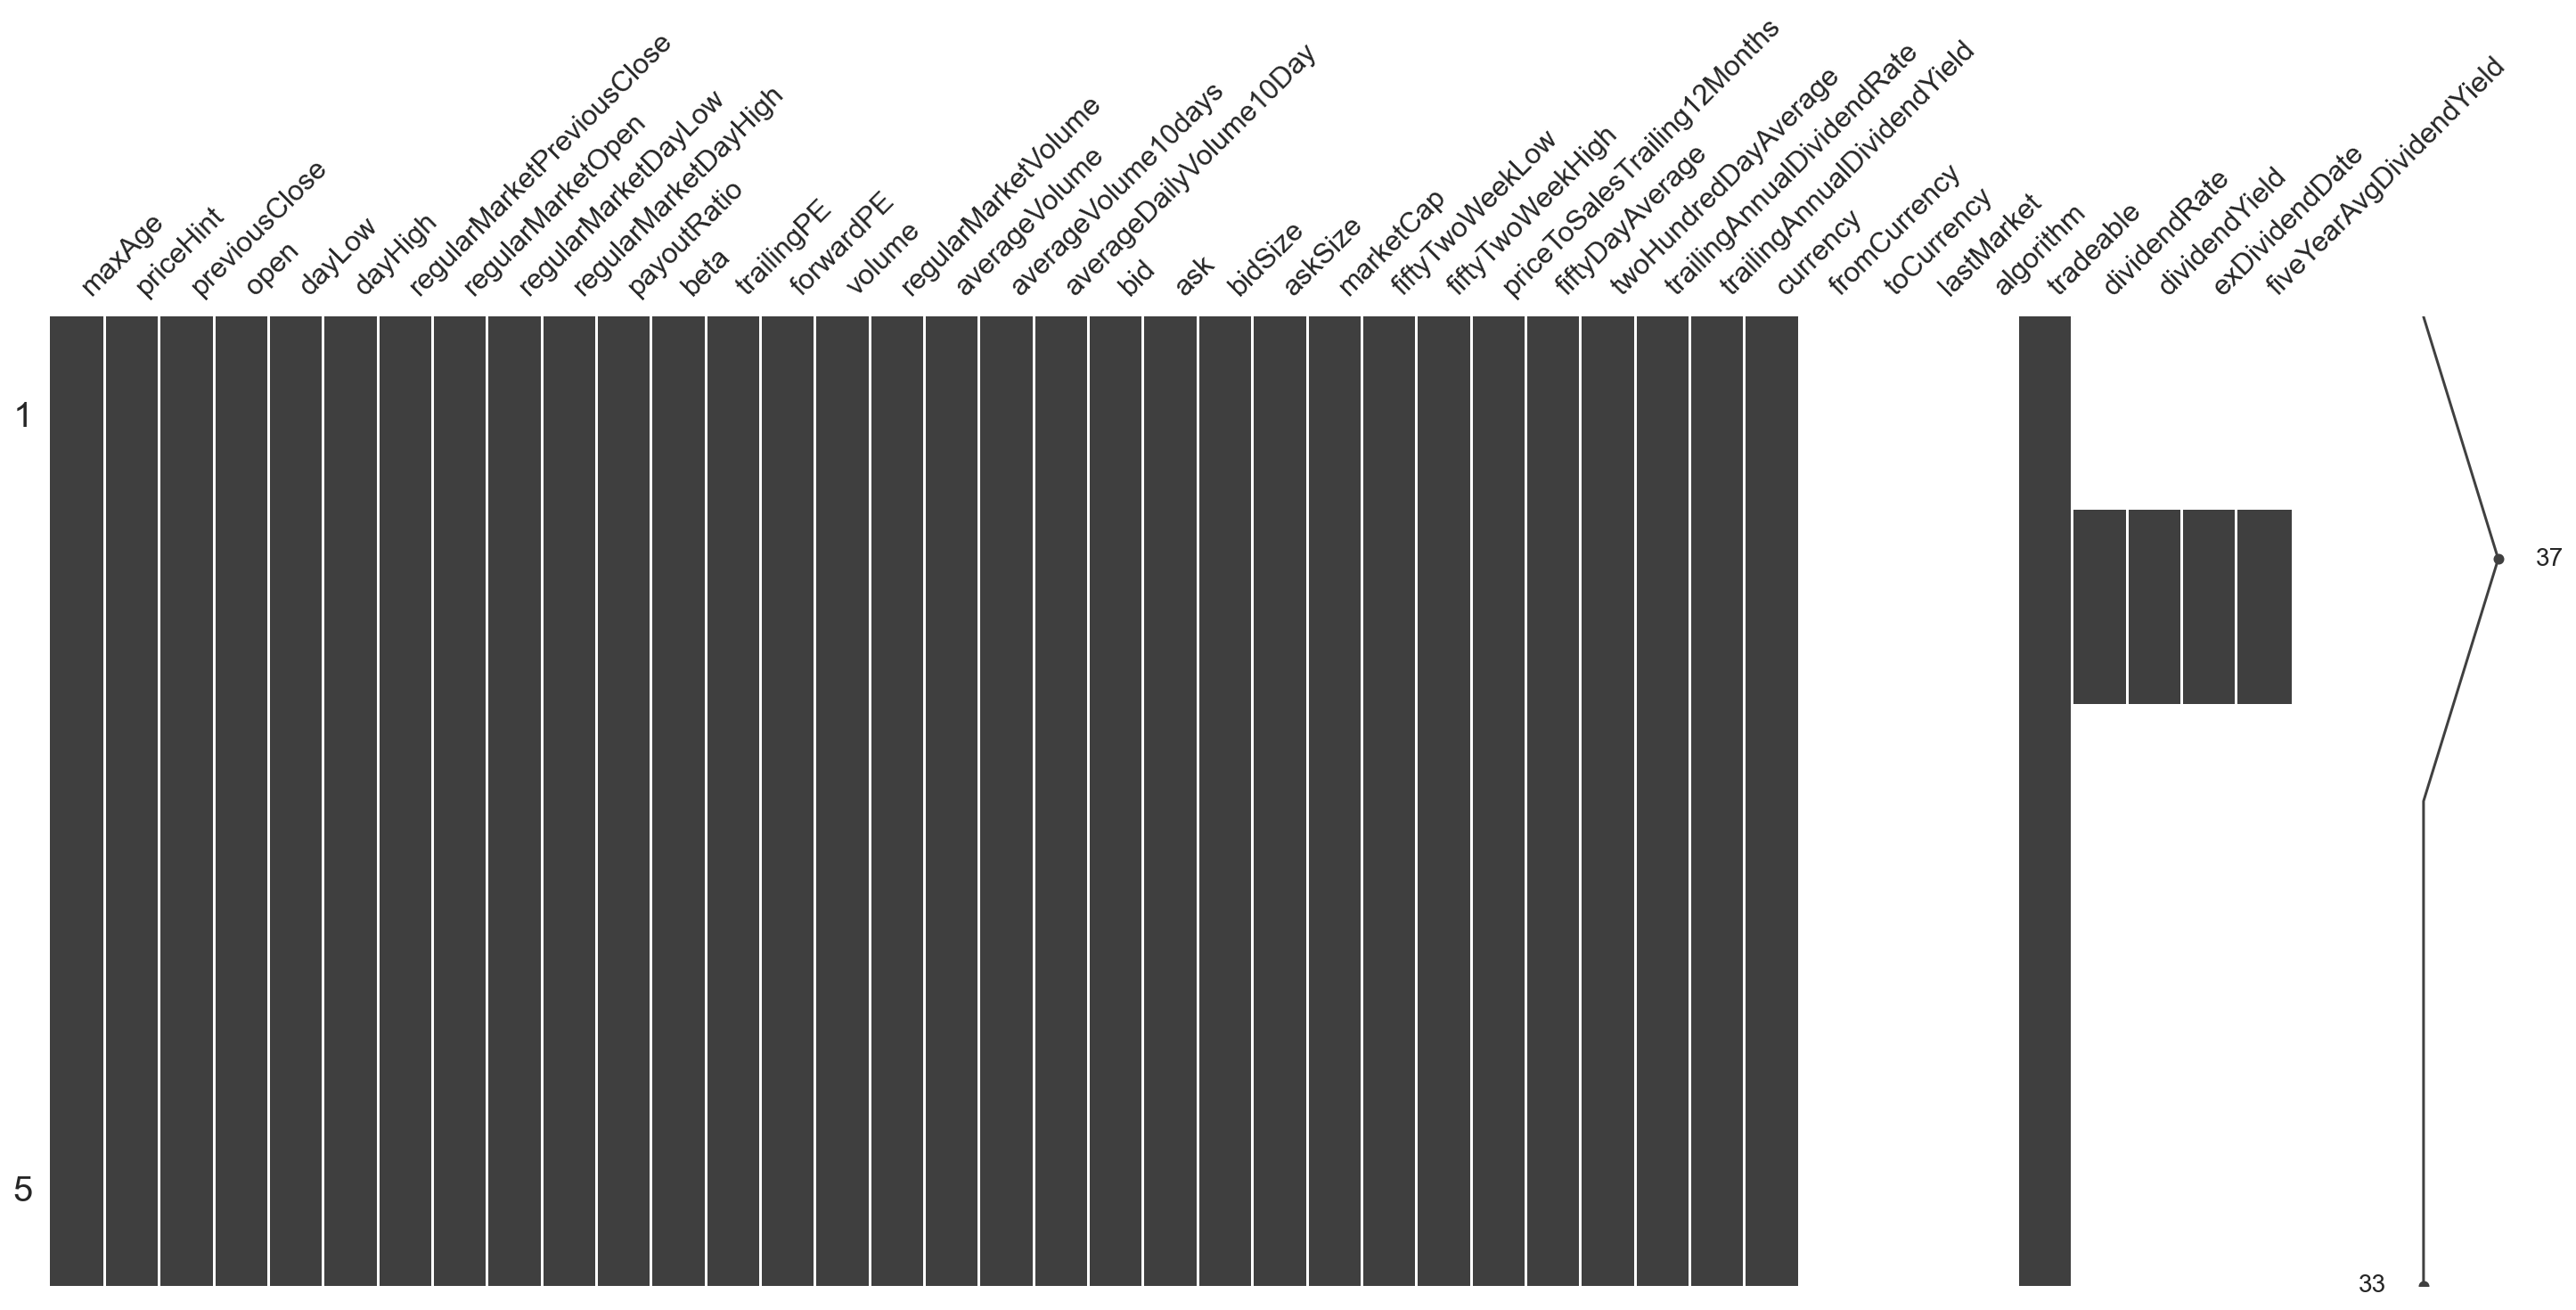

In [6]:
msno.matrix(df)

In [7]:
df.dropna(inplace=True,axis=1)
df.drop_duplicates(inplace=True,keep='first')
df

,maxAge,priceHint,previousClose,open,dayLow,dayHigh,regularMarketPreviousClose,regularMarketOpen,regularMarketDayLow,regularMarketDayHigh,payoutRatio,beta,trailingPE,forwardPE,volume,regularMarketVolume,averageVolume,averageVolume10days,averageDailyVolume10Day,bid,ask,bidSize,askSize,marketCap,fiftyTwoWeekLow,fiftyTwoWeekHigh,priceToSalesTrailing12Months,fiftyDayAverage,twoHundredDayAverage,trailingAnnualDividendRate,trailingAnnualDividendYield,currency,tradeable
fb,1,2,207.71,209.39,205.18,210.74,207.71,209.39,205.18,210.74,0.00,1.29,14.97,13.90,37128438,37128438,30726560,56780300,56780300,204.60,204.66,1100,1000,561155145728,205.18,384.33,4.76,301.57,332.35,0.00,0.00,USD,False
aapl,1,2,168.88,169.82,166.19,170.54,168.88,169.82,166.19,170.54,0.14,1.19,27.81,25.50,82772674,82772674,101271931,77665000,77665000,166.48,166.59,900,800,2730235789312,116.21,182.94,7.22,172.46,151.10,0.86,0.01,USD,False
amzn,1,2,3093.05,3109.99,3018.22,3109.99,3093.05,3109.99,3018.22,3109.99,0.00,1.13,47.09,42.21,3180205,3180205,3668486,3565250,3565250,3030.00,3034.00,1400,800,1553007116288,2707.04,3773.08,3.31,3199.81,3355.77,0.00,0.00,USD,False
nflx,1,2,386.67,392.53,389.07,402.87,386.67,392.53,389.07,402.87,0.00,0.96,34.81,27.48,6801668,6801668,7205883,6813950,6813950,389.05,389.51,1200,800,173718290432,351.46,700.99,5.85,502.79,552.83,0.00,0.00,USD,False
goog,1,2,2646.17,2660.75,2606.14,2676.48,2646.17,2660.75,2606.14,2676.48,0.00,1.07,23.26,19.26,1570608,1570608,1460732,1604990,1604990,2597.01,2600.00,1000,1200,1724261203968,2002.02,3042.00,6.69,2797.06,2736.01,0.00,0.00,USD,False


In [8]:
df.columns

Index(['maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh',
       'regularMarketPreviousClose', 'regularMarketOpen',
       'regularMarketDayLow', 'regularMarketDayHigh', 'payoutRatio', 'beta',
       'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume',
       'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day',
       'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow',
       'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage',
       'twoHundredDayAverage', 'trailingAnnualDividendRate',
       'trailingAnnualDividendYield', 'currency', 'tradeable'],
      dtype='object')

In [9]:
df.dtypes

maxAge                          object
priceHint                       object
previousClose                   object
open                            object
dayLow                          object
dayHigh                         object
regularMarketPreviousClose      object
regularMarketOpen               object
regularMarketDayLow             object
regularMarketDayHigh            object
payoutRatio                     object
beta                            object
trailingPE                      object
forwardPE                       object
volume                          object
regularMarketVolume             object
averageVolume                   object
averageVolume10days             object
averageDailyVolume10Day         object
bid                             object
ask                             object
bidSize                         object
askSize                         object
marketCap                       object
fiftyTwoWeekLow                 object
fiftyTwoWeekHigh         

In [11]:
import yahooquery


In [13]:
print(yahooquery.Ticker.__doc__)



    Base class for interacting with Yahoo Finance API

    Arguments
    ----------
    symbols: str or list
        Symbol or list collection of symbols

    Keyword Arguments
    -----------------
    asynchronous: bool, default False, optional
        Defines whether the requests are made synchronously or asynchronously.
    backoff_factor: float, default 0.3, optional
        A factor, in seconds, to apply between attempts after a second try.
        Done only when there is a failed request and error code is in the
        status_forcelist
    country: str, default 'united states', optional
        This allows you to alter the following query parameters that are
        sent with each request:  lang, region, and corsDomain.
    formatted: bool, default False, optional
        Quantitative values are given as dictionaries with at least two
        keys:  'raw' and 'fmt'.  The 'raw' key expresses value numerically
        and the 'fmt' key expresses the value as a string.  See Notes

In [21]:
ret = yahooquery.get_market_summary()
df = pd.DataFrame(ret)
df

,fullExchangeName,exchangeTimezoneName,symbol,regularMarketChange,gmtOffSetMilliseconds,firstTradeDateMilliseconds,exchangeDataDelayedBy,language,regularMarketTime,regularMarketChangePercent,exchangeTimezoneShortName,quoteType,marketState,regularMarketPrice,market,quoteSourceName,priceHint,tradeable,exchange,sourceInterval,shortName,region,triggerable,regularMarketPreviousClose,headSymbolAsString,headSymbol,contractSymbol,currency,longName
0,SNP,America/New_York,^GSPC,"{'raw': -31.389648, 'fmt': '-31.39'}",-18000000,-1325583000000,0,en-US,"{'raw': 1645221565, 'fmt': '4:59PM EST'}","{'raw': -0.7166161, 'fmt': '-0.72%'}",EST,INDEX,CLOSED,"{'raw': 4348.87, 'fmt': '4,348.87'}",us_market,Delayed Quote,2.00,False,SNP,15,S&P 500,US,False,"{'raw': 4380.26, 'fmt': '4,380.26'}",NaN,NaN,NaN,NaN,NaN
1,DJI,America/New_York,^DJI,"{'raw': -232.82031, 'fmt': '-232.82'}",-18000000,694362600000,0,en-US,"{'raw': 1645221565, 'fmt': '4:59PM EST'}","{'raw': -0.67853904, 'fmt': '-0.68%'}",EST,INDEX,CLOSED,"{'raw': 34079.18, 'fmt': '34,079.18'}",us_market,Delayed Quote,2.00,False,DJI,120,Dow 30,US,False,"{'raw': 34312.0, 'fmt': '34,312.00'}",NaN,NaN,NaN,NaN,NaN
2,Nasdaq GIDS,America/New_York,^IXIC,"{'raw': -168.63477, 'fmt': '-168.63'}",-18000000,34612200000,0,en-US,"{'raw': 1645222559, 'fmt': '5:15PM EST'}","{'raw': -1.2294121, 'fmt': '-1.23%'}",EST,INDEX,CLOSED,"{'raw': 13548.065, 'fmt': '13,548.07'}",us_market,Delayed Quote,2.00,False,NIM,15,Nasdaq,US,False,"{'raw': 13716.7, 'fmt': '13,716.70'}",NaN,NaN,NaN,NaN,NaN
3,Chicago Options,America/New_York,^RUT,"{'raw': -18.756714, 'fmt': '-18.76'}",-18000000,558279000000,20,en-US,"{'raw': 1645219811, 'fmt': '4:30PM EST'}","{'raw': -0.92484623, 'fmt': '-0.92%'}",EST,INDEX,CLOSED,"{'raw': 2009.3333, 'fmt': '2,009.33'}",us_market,NaN,2.00,False,WCB,15,Russell 2000,US,False,"{'raw': 2028.09, 'fmt': '2,028.09'}",NaN,NaN,NaN,NaN,NaN
4,NY Mercantile,America/New_York,CL=F,"{'raw': 2.6800003, 'fmt': '2.68'}",-18000000,967003200000,30,en-US,"{'raw': 1645497764, 'fmt': '9:42PM EST'}","{'raw': 2.9427915, 'fmt': '2.94%'}",EST,FUTURE,CLOSED,"{'raw': 93.75, 'fmt': '93.75'}",us24_market,NaN,NaN,False,NYM,30,Crude Oil,US,False,"{'raw': 91.07, 'fmt': '91.07'}",CL=F,True,False,NaN,NaN
5,COMEX,America/New_York,GC=F,"{'raw': 10.5, 'fmt': '10.50'}",-18000000,967608000000,30,en-US,"{'raw': 1645497775, 'fmt': '9:42PM EST'}","{'raw': 0.55268973, 'fmt': '0.55%'}",EST,FUTURE,CLOSED,"{'raw': 1910.3, 'fmt': '1,910.30'}",us24_market,NaN,NaN,False,CMX,15,Gold,US,False,"{'raw': 1899.8, 'fmt': '1,899.80'}",GC=F,True,False,NaN,NaN
6,COMEX,America/New_York,SI=F,"{'raw': -0.0069999695, 'fmt': '-0.01'}",-18000000,967608000000,30,en-US,"{'raw': 1645497775, 'fmt': '9:42PM EST'}","{'raw': -0.029176265, 'fmt': '-0.03%'}",EST,FUTURE,CLOSED,"{'raw': 23.985, 'fmt': '23.99'}",us24_market,NaN,NaN,False,CMX,15,Silver,US,False,"{'raw': 23.992, 'fmt': '23.99'}",SI=F,True,False,NaN,NaN
7,CCY,Europe/London,EURUSD=X,"{'raw': -0.0003838539, 'fmt': '-0.0004'}",0,1070236800000,0,en-US,"{'raw': 1645498356, 'fmt': '2:52AM GMT'}","{'raw': -0.03392403, 'fmt': '-0.03%'}",GMT,CURRENCY,REGULAR,"{'raw': 1.1308379, 'fmt': '1.1308'}",ccy_market,Delayed Quote,4.00,False,CCY,15,EUR/USD,US,False,"{'raw': 1.1312218, 'fmt': '1.1312'}",NaN,NaN,NaN,USD,NaN
8,ICE Futures,America/New_York,^TNX,"{'raw': -0.04000008, 'fmt': '-0.0400'}",-18000000,-252356400000,30,en-US,"{'raw': 1645214393, 'fmt': '2:59PM EST'}","{'raw': -2.0284019, 'fmt': '-2.03%'}",EST,INDEX,CLOSED,"{'raw': 1.9319999, 'fmt': '1.9320'}",us24_market,NaN,4.00,False,NYB,30,10-Yr Bond,US,False,"{'raw': 1.972, 'fmt': '1.9720'}",NaN,NaN,NaN,NaN,Treasury Yield 10 Years
9,CCY,Europe/London,GBPUSD=X,"{'raw': -0.0010350943, 'fmt': '-0.0010'}",0,1070236800000,0,en-US,"{'raw': 1645498356, 'fmt': '2:52AM GMT'}","{'raw': -0.07610361, 'fmt': '-0.08%'}",GMT,CURRENCY,REGULAR,"{'raw': 1.359028, 'fmt': '1.3590'}",ccy_market,Delayed Quote,4.00,False,CCY,15,GBP/USD,US,False,"{'raw': 1.3600631, 'fmt': '1.3601'}",NaN,NaN,NaN,USD,NaN


In [23]:
trending = yahooquery.get_trending()
trending

{'count': 20,
 'quotes': [{'symbol': '9988.HK'},
  {'symbol': '^DJI'},
  {'symbol': '^IXIC'},
  {'symbol': 'IMOEX.ME'},
  {'symbol': 'XRP-USD'},
  {'symbol': '^GSPC'},
  {'symbol': 'NQ=F'},
  {'symbol': '1211.HK'},
  {'symbol': 'YM=F'},
  {'symbol': 'APA'},
  {'symbol': '0700.HK'},
  {'symbol': '1810.HK'},
  {'symbol': 'RUB=X'},
  {'symbol': '0175.HK'},
  {'symbol': '^CMC200'},
  {'symbol': 'BABA'},
  {'symbol': 'RSX'},
  {'symbol': 'SPY'},
  {'symbol': '0001.HK'},
  {'symbol': 'ES=F'}],
 'jobTimestamp': 1645495693949,
 'startInterval': 202202220100}

In [24]:
yahooquery.search('apple')

{'explains': [],
 'count': 15,
 'quotes': [{'exchange': 'NMS',
   'shortname': 'Apple Inc.',
   'quoteType': 'EQUITY',
   'symbol': 'AAPL',
   'index': 'quotes',
   'score': 200398.0,
   'typeDisp': 'Equity',
   'longname': 'Apple Inc.',
   'exchDisp': 'NASDAQ',
   'isYahooFinance': True},
  {'exchange': 'NYQ',
   'shortname': 'Apple Hospitality REIT, Inc.',
   'quoteType': 'EQUITY',
   'symbol': 'APLE',
   'index': 'quotes',
   'score': 21020.0,
   'typeDisp': 'Equity',
   'longname': 'Apple Hospitality REIT, Inc.',
   'exchDisp': 'NYSE',
   'isYahooFinance': True},
  {'exchange': 'FRA',
   'shortname': 'APPLE INC',
   'quoteType': 'EQUITY',
   'symbol': 'APC.F',
   'index': 'quotes',
   'score': 20455.0,
   'typeDisp': 'Equity',
   'longname': 'Apple Inc.',
   'exchDisp': 'Frankfurt',
   'isYahooFinance': True},
  {'exchange': 'NEO',
   'shortname': 'APPLE CDR (CAD HEDGED)',
   'quoteType': 'EQUITY',
   'symbol': 'AAPL.NE',
   'index': 'quotes',
   'score': 20264.0,
   'typeDisp': 'E